In [3]:
import emat
emat.require_version('0.5.2')
import pandas as pd
from emat.viz import scatter_graphs
from emat.model import PythonCoreModel
from emat.analysis import display_experiments, contrast_experiments
from emat.analysis.prim import Prim
from emat.analysis import CART

emat 0.5.3, plotly 5.1.0


In [4]:
scope = emat.Scope('ve_scope_triangular.yaml')
db = emat.SQLiteDB()
scope.store_scope(db)

In [5]:
def tempFun():
    return None

In [6]:
g = PythonCoreModel(
    function=tempFun,
    configuration=None,
    scope=scope,
    db=db,
)
g

<emat.PythonCoreModel "EMAT" with 8 uncertainties, 6 measures>

In [7]:
lhs = pd.read_csv('VE_results_input_design_triangular.csv')
lhs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Congestion charges  90 non-null     float64
 1   Employment growth   90 non-null     float64
 2   Fuel costs          90 non-null     float64
 3   Population          90 non-null     float64
 4   Road capacity       90 non-null     float64
 5   Telework            90 non-null     float64
 6   Transit service     90 non-null     float64
 7   VMT tax             90 non-null     float64
 8   Dvmt                90 non-null     float64
 9   CO2e                90 non-null     float64
 10  VehicleTrips        90 non-null     float64
 11  WalkTrips           90 non-null     float64
 12  BikeTrips           90 non-null     float64
 13  TransitTrips        90 non-null     float64
dtypes: float64(14)
memory usage: 10.0 KB


In [8]:
db.write_experiment_all(
    'VisionEval',
    'lhs',
    emat.SOURCE_IS_CORE_MODEL,
    lhs,
)

In [9]:
len(g.read_experiments('lhs'))

C:\Users\UJ_HOME\anaconda3\envs\emat\lib\site-packages\emat\database\sqlite\sqlite_db.py:1821: FutureWarning:

In a future version of pandas all arguments of MultiIndex.set_levels except for the argument 'levels' will be keyword-only



90

In [10]:
g.scope.get_measure_names()

['Dvmt', 'CO2e', 'VehicleTrips', 'WalkTrips', 'BikeTrips', 'TransitTrips']

In [11]:
mm = g.create_metamodel_from_design(
    'lhs',
    include_measures=g.scope.get_measure_names(),
    suppress_converge_warnings=True,
)
mm

<emat.PythonCoreModel "MetaModel1", metamodel_id=1 with 8 uncertainties, 6 measures>

In [12]:
mm.function

<emat.MetaModel 8 inputs -> 6 outputs>

In [13]:
mm.function.regression.lr.r2

Dvmt            0.959502
CO2e            0.959910
VehicleTrips    0.961732
WalkTrips       0.998926
BikeTrips       0.998622
TransitTrips    0.997092
dtype: float64

In [14]:
mm.get_feature_scores('lhs')

C:\Users\UJ_HOME\anaconda3\envs\emat\lib\site-packages\emat\database\sqlite\sqlite_db.py:1821: FutureWarning:

In a future version of pandas all arguments of MultiIndex.set_levels except for the argument 'levels' will be keyword-only



In [15]:
#mm.function.regression.lr.coefficients_summary()

In [62]:
mm.function.cross_val_scores()

In [17]:
design = mm.design_experiments(n_samples=10000, sampler='lhs')
result = mm.run_experiments(design, db=False)

<xmle.Elem 'img' with 0 children>
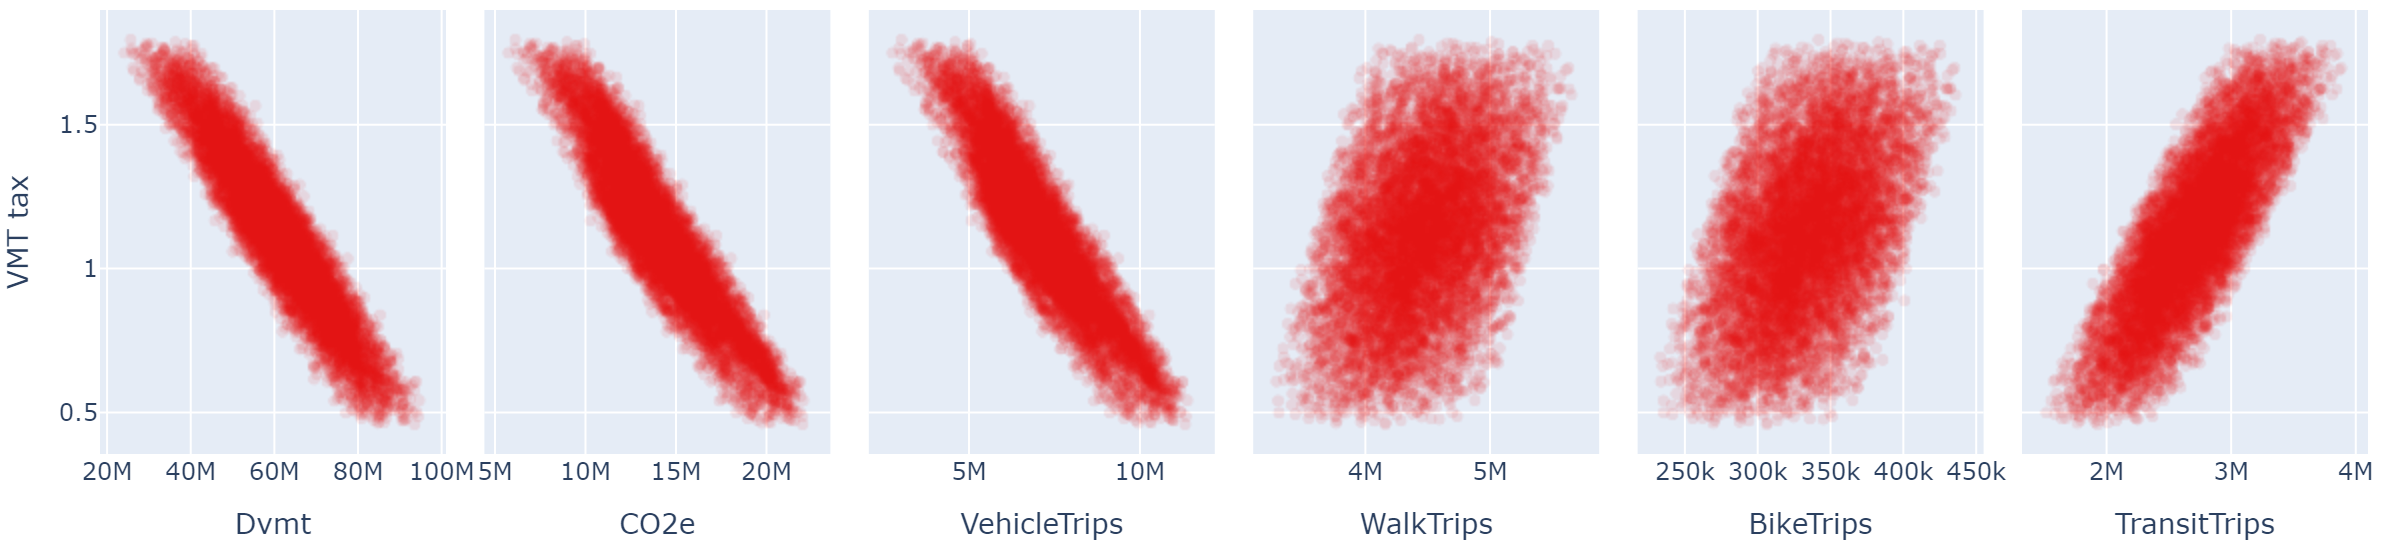

In [18]:
scatter_graphs('VMT tax', result, scope=mm.scope, render='png')

<xmle.Elem 'img' with 0 children>
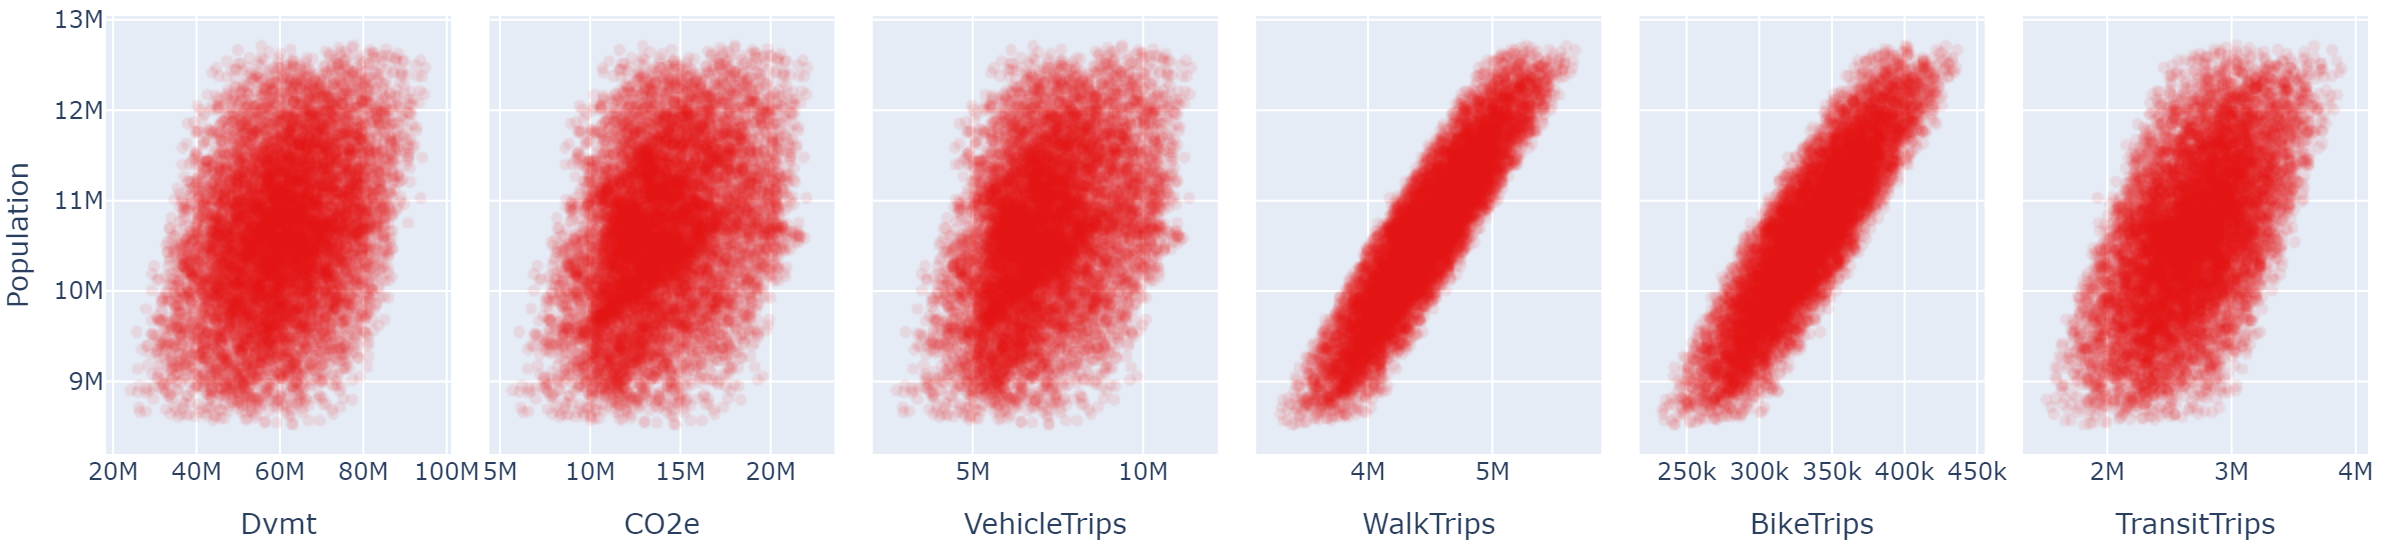

In [19]:
scatter_graphs('Population', result, scope=mm.scope, render='png')

Dvmt

<xmle.Elem 'img' with 0 children>
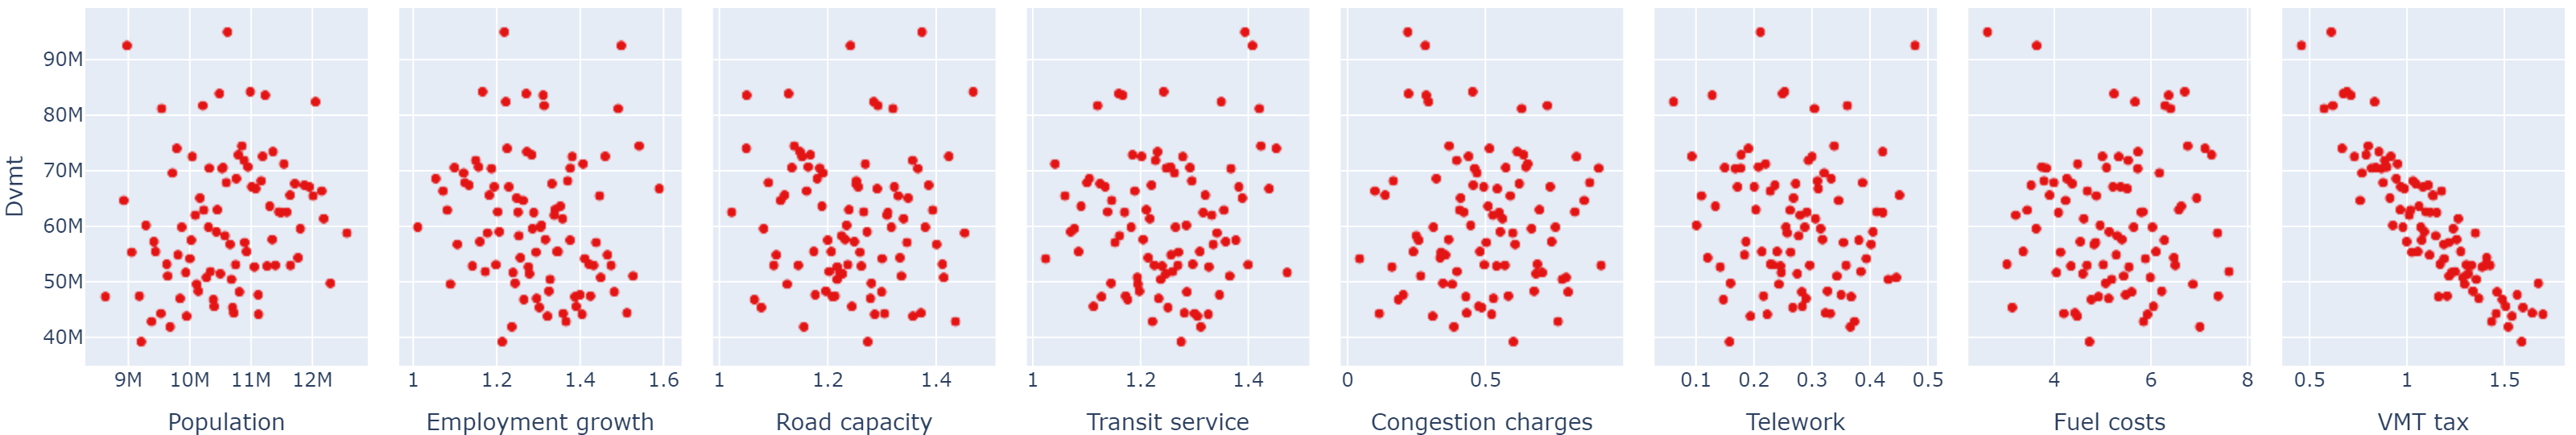

CO2e

<xmle.Elem 'img' with 0 children>
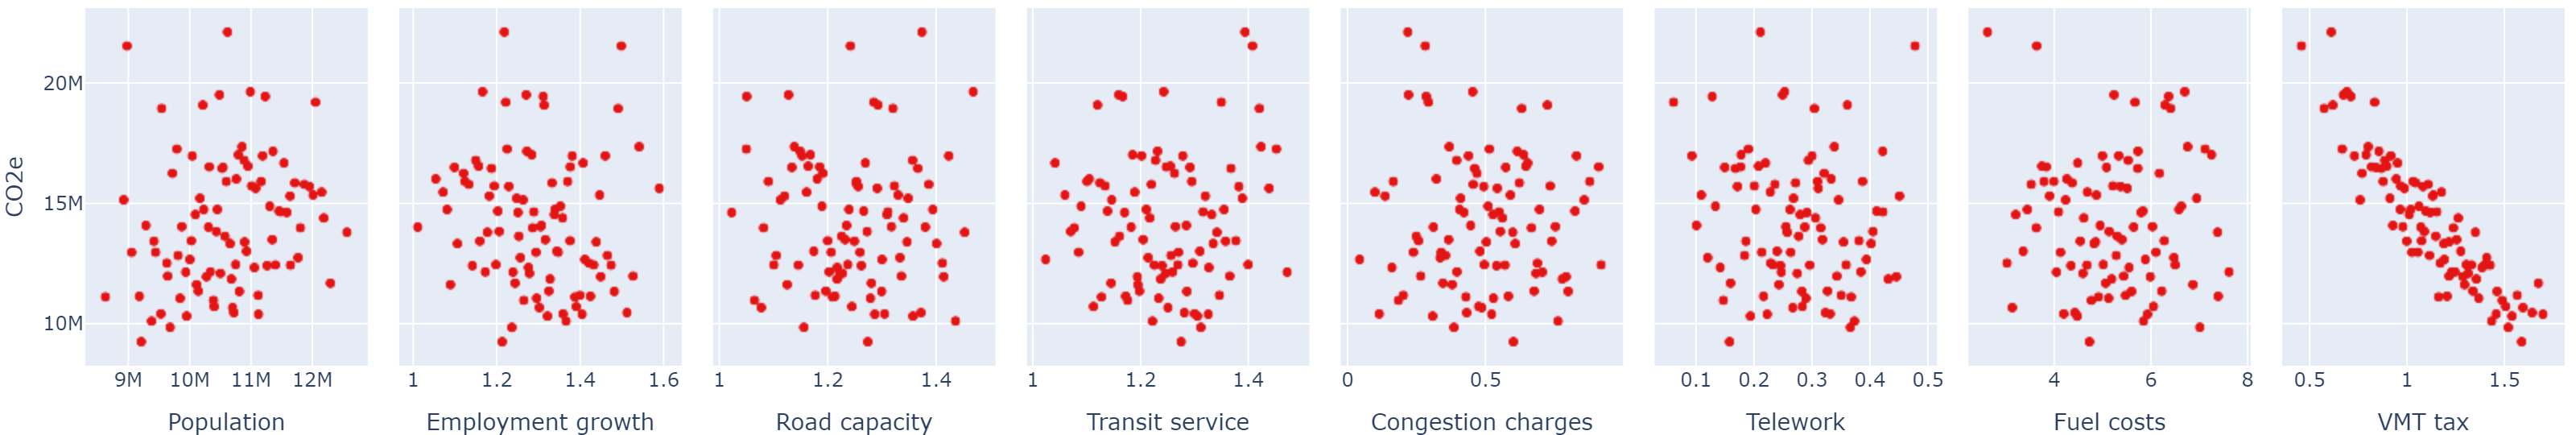

VehicleTrips

<xmle.Elem 'img' with 0 children>
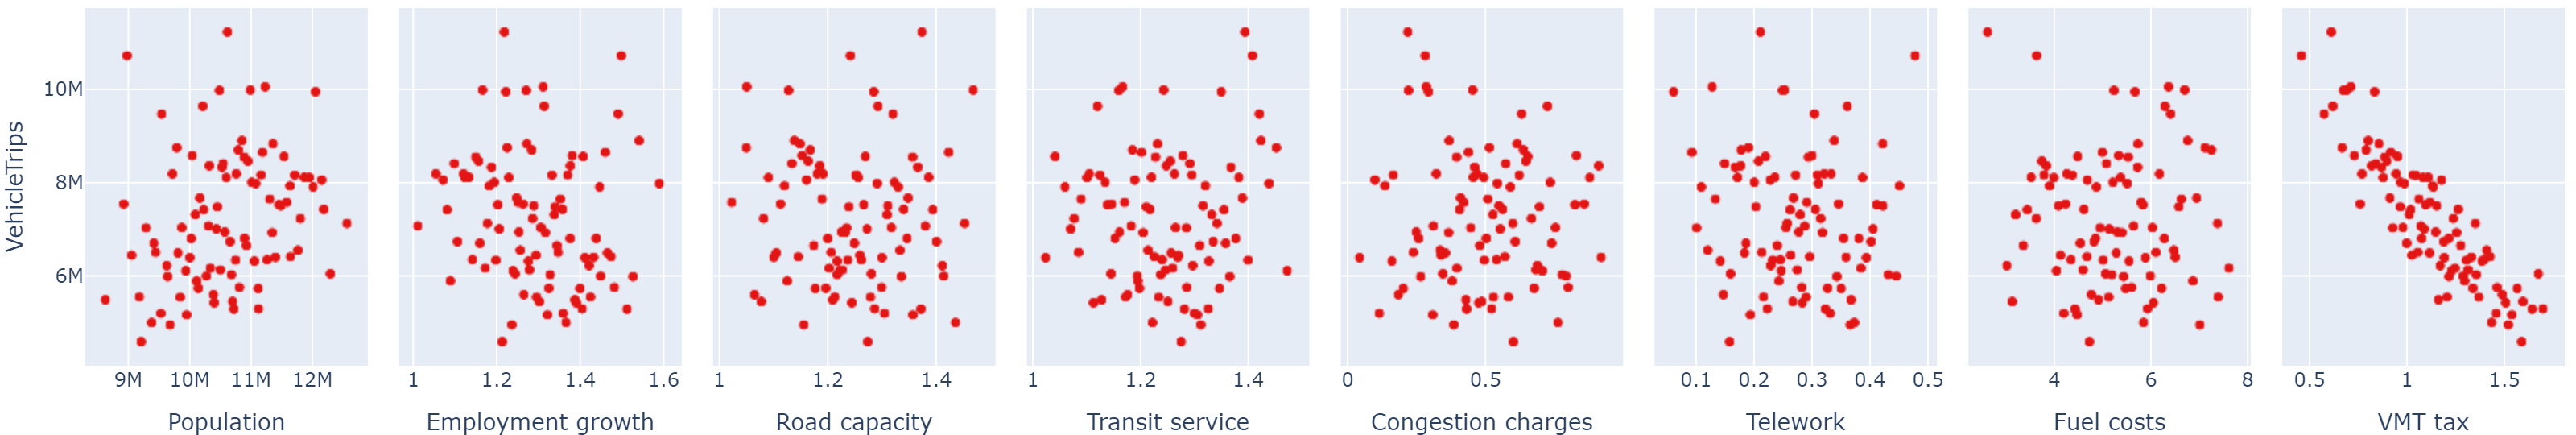

WalkTrips

<xmle.Elem 'img' with 0 children>
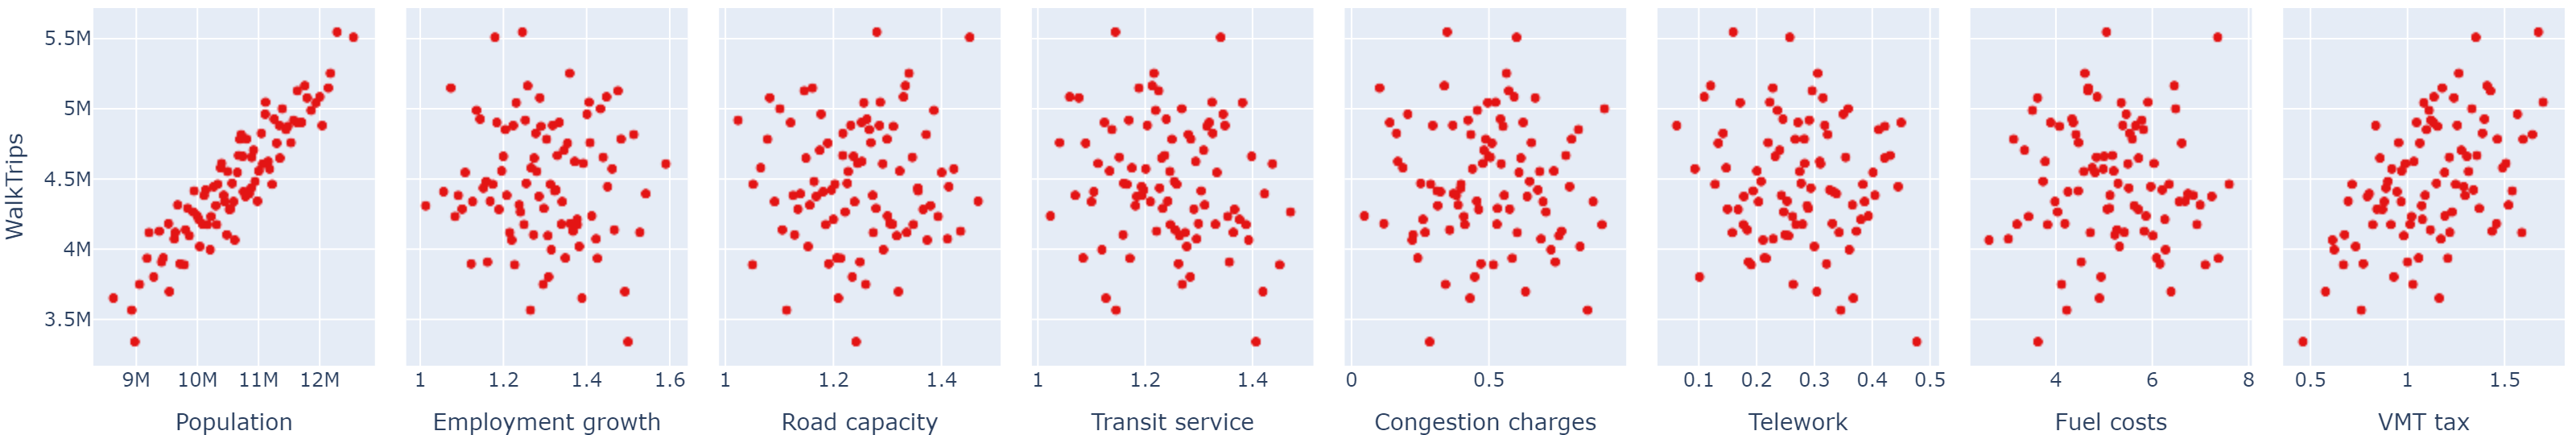

BikeTrips

<xmle.Elem 'img' with 0 children>
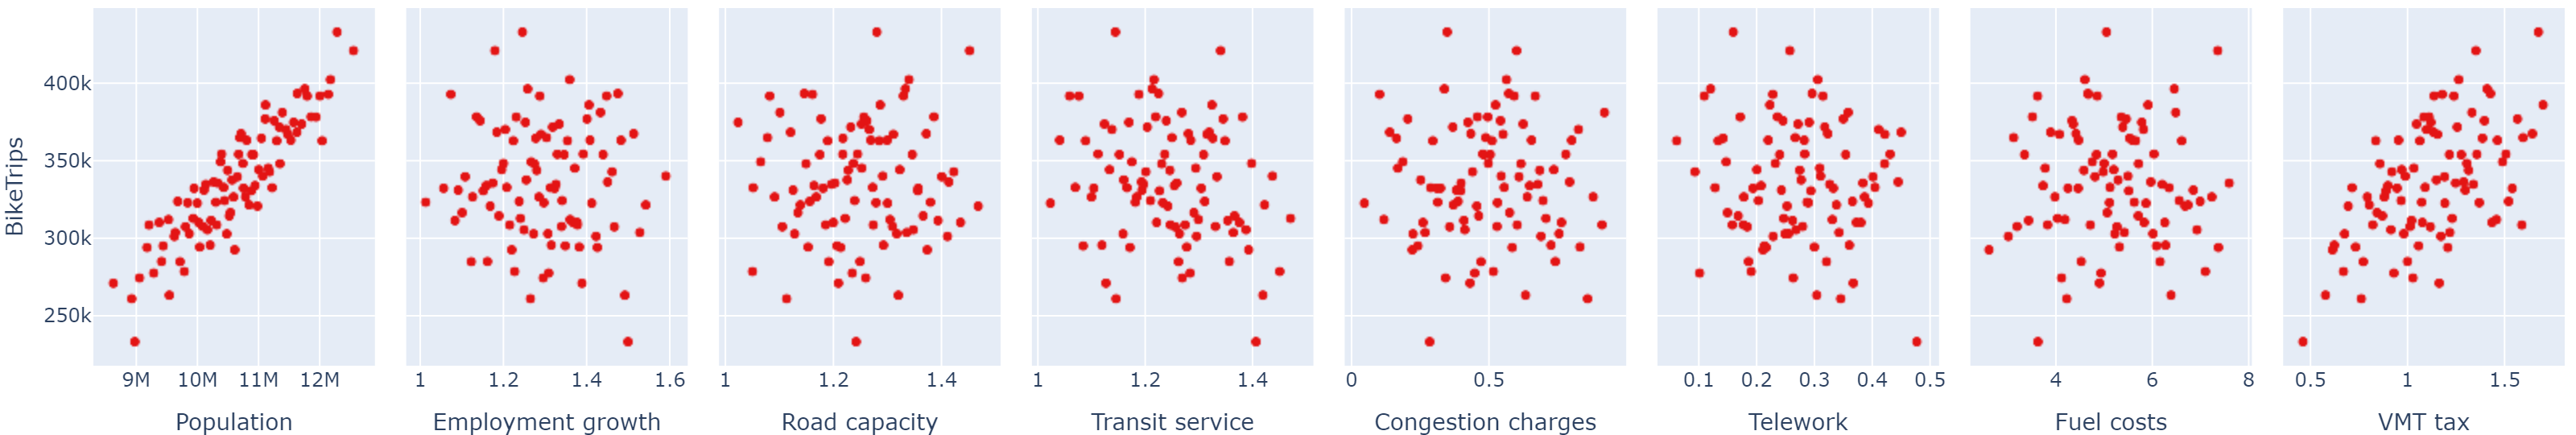

TransitTrips

<xmle.Elem 'img' with 0 children>
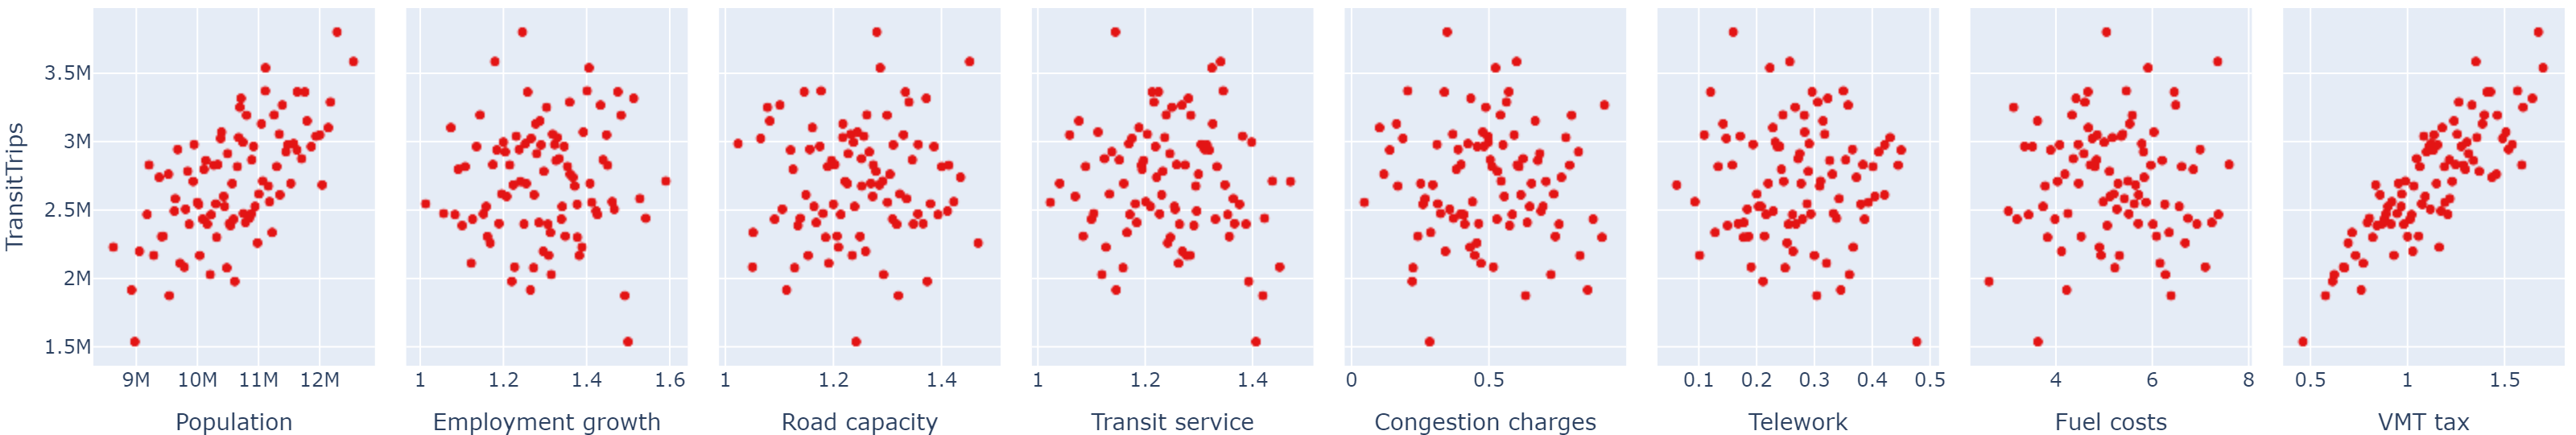

In [61]:
display_experiments(scope, lhs)

In [21]:
design2 = mm.design_experiments(scope=scope,
                                     db=db,
                                     n_samples_per_factor=10,
                                     sampler='lhs',
                                     random_seed=42)

result2 = mm.run_experiments(design2)

Dvmt

<xmle.Elem 'img' with 0 children>
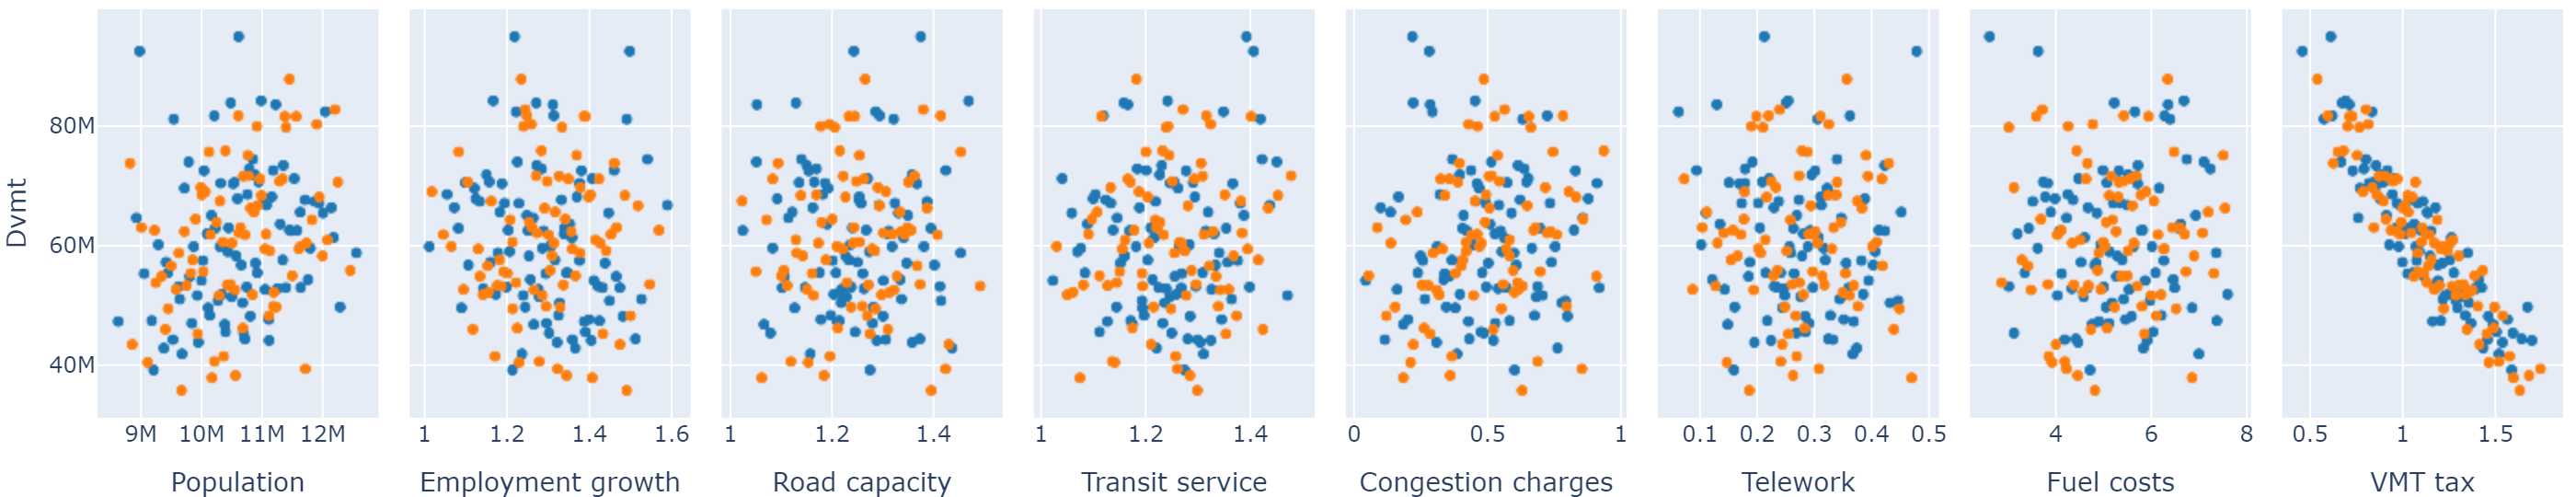

CO2e

<xmle.Elem 'img' with 0 children>
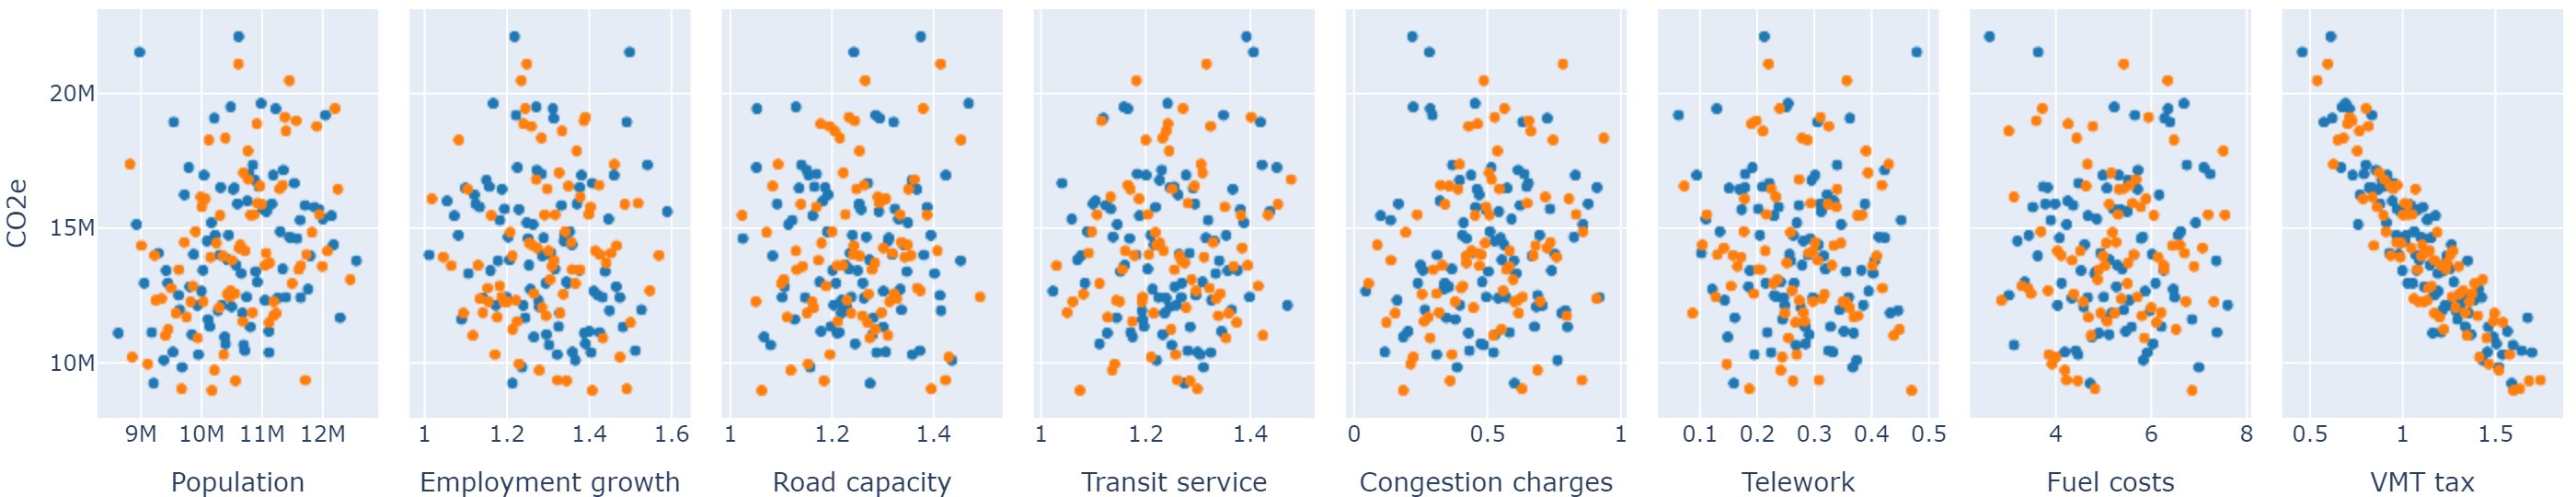

VehicleTrips

<xmle.Elem 'img' with 0 children>
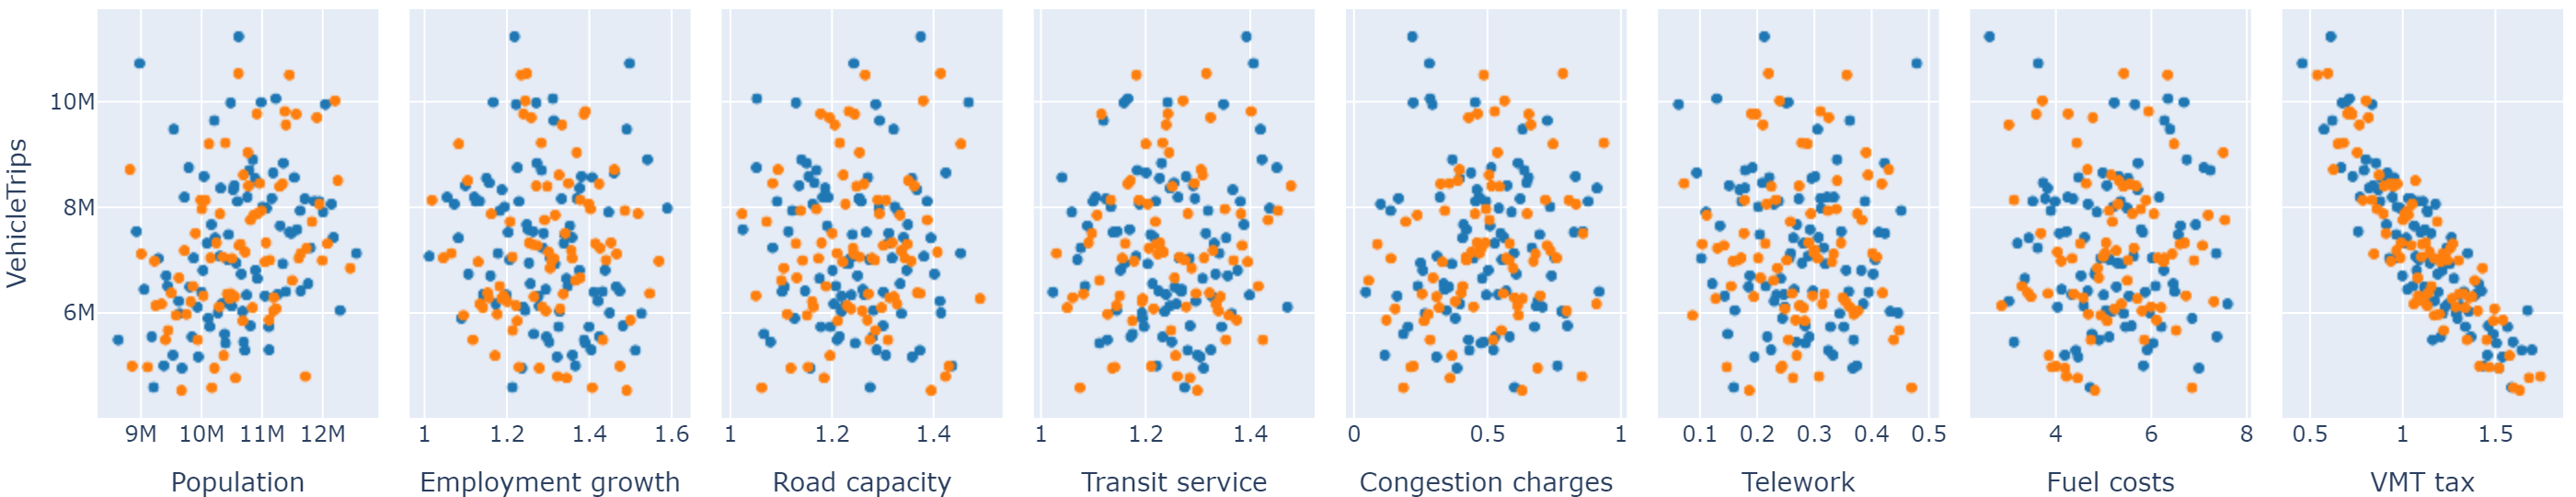

WalkTrips

<xmle.Elem 'img' with 0 children>
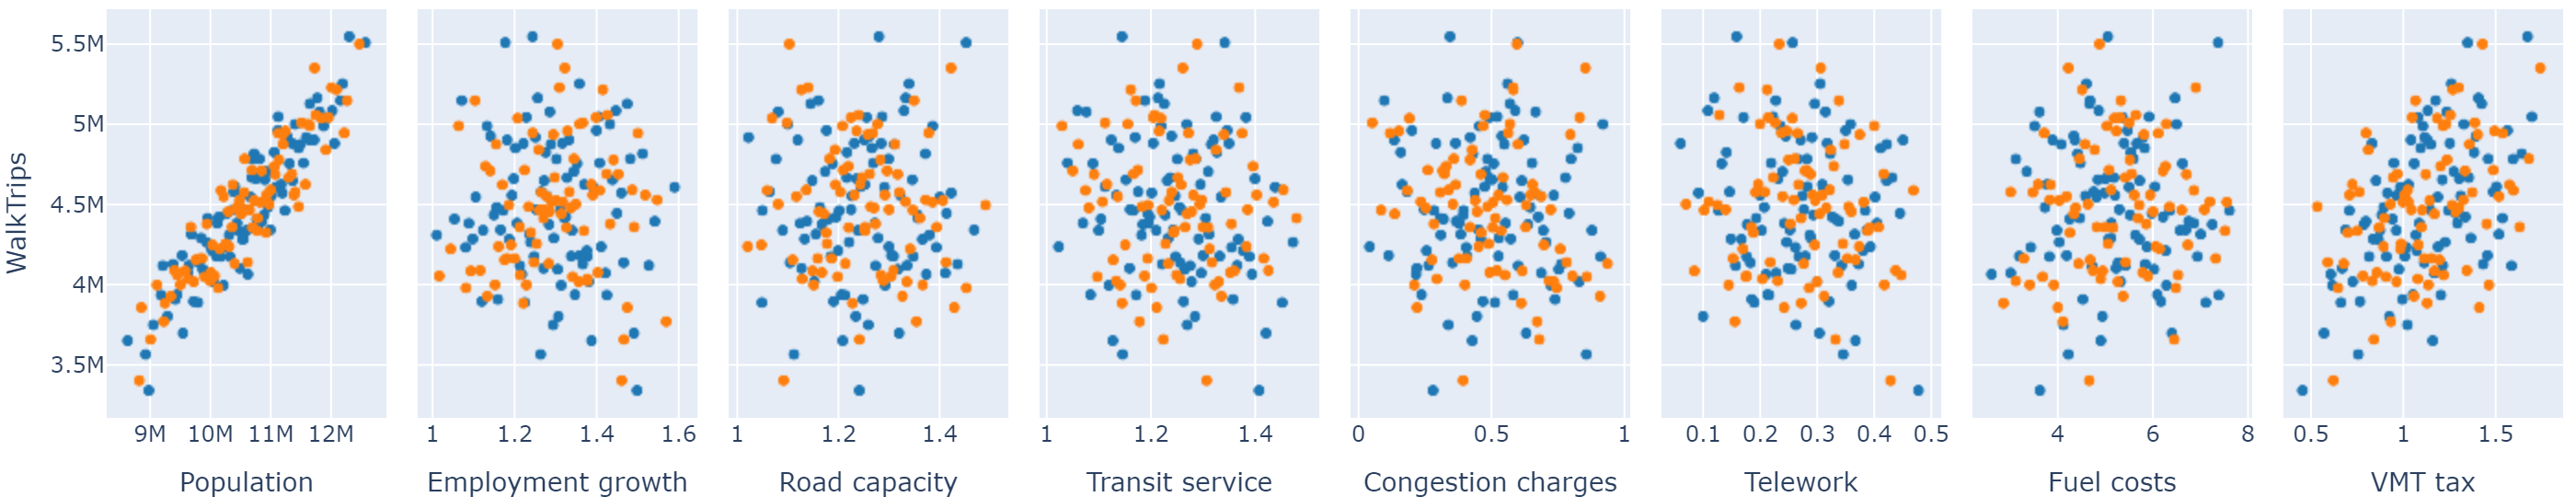

BikeTrips

<xmle.Elem 'img' with 0 children>
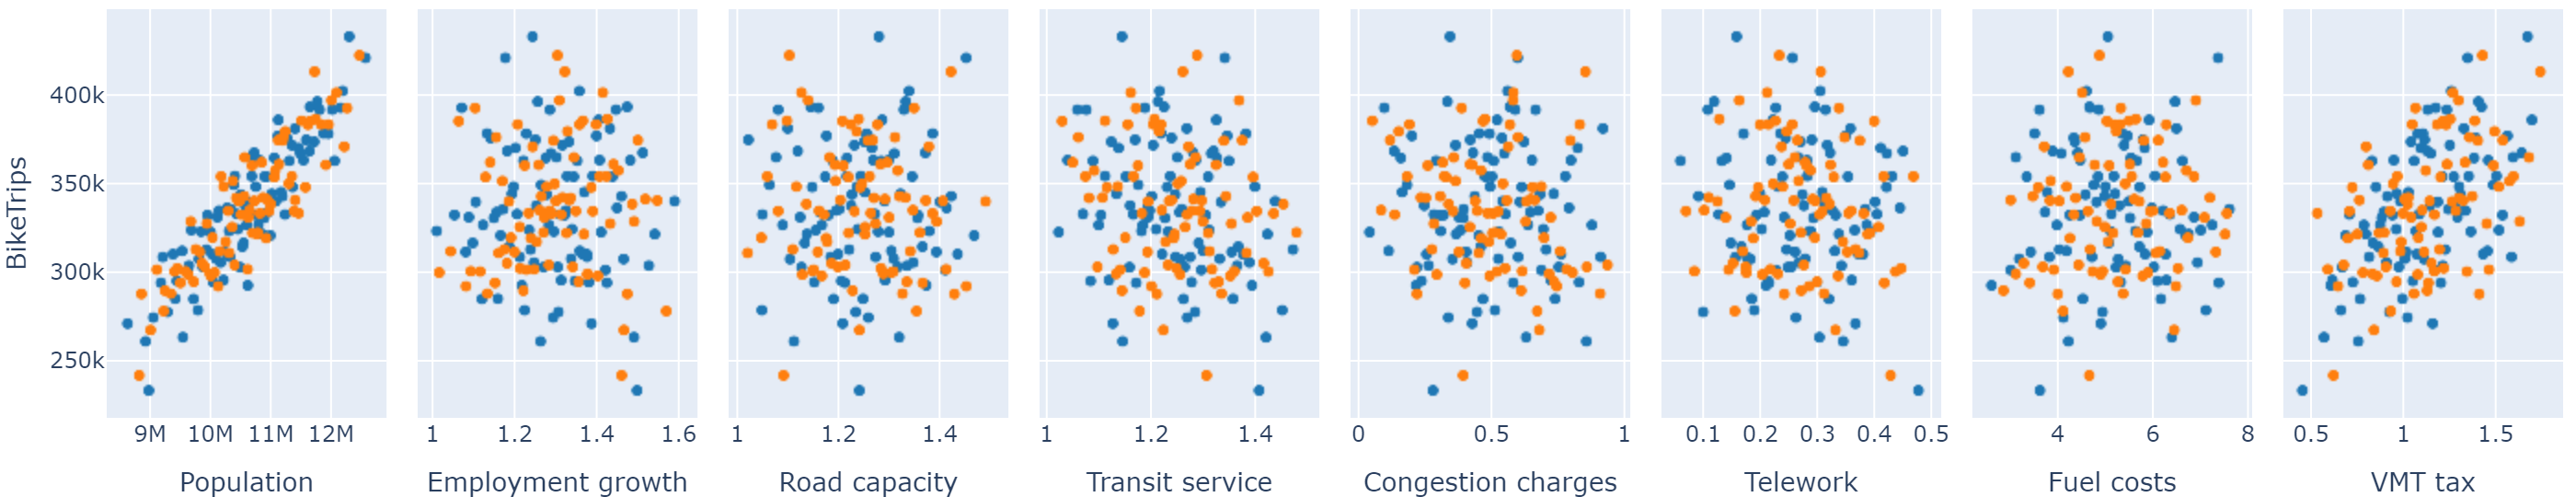

TransitTrips

<xmle.Elem 'img' with 0 children>
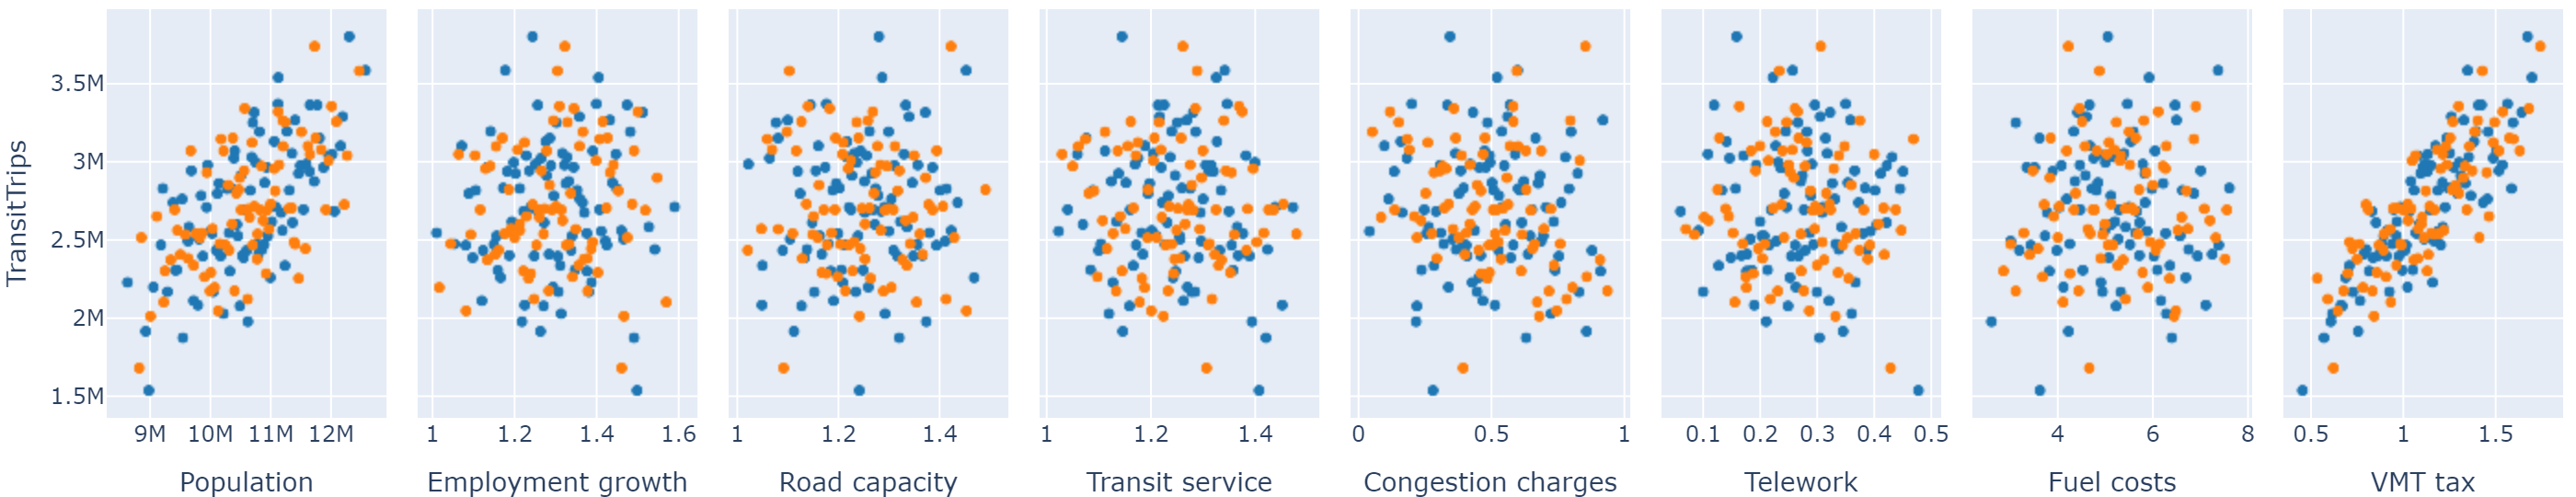

In [22]:
contrast_experiments(scope, lhs, result2)


In [23]:
of_interest = result['BikeTrips']>3.5e+05

In [24]:
discovery = Prim(
    design,
    of_interest,
    threshold=0.02,
    scope=scope
)

box1 = discovery.find_box()

* Coverage = number of cases of interest in the box divided by total number of cases of interest (similar to recall = $(TP)/(TP + FN)$)
* Density = number of cases of interest in the box divided by the total number of cases in the box (similar to precision = $(TP)/(TP + FP)$)

In [25]:
box1.tradeoff_selector()

FigureWidget({
    'data': [{'hoverinfo': 'text',
              'marker': {'color': [0, 1, 1, 1, 1, 1, 1, 1, 1…

In [26]:
box1.select(20)
box1

<PrimBox peel 21 of 38>
   coverage: 0.83799
   density:  0.81364
   mean: 0.81364
   mass: 0.35790
   restricted dims: 2
                             min              max
     Population  10800042.484003  12717254.385961
     VMT tax            0.808931         1.795368

In [27]:
box1.splom()

FigureWidget({
    'data': [{'mode': 'markers',
              'showlegend': False,
              'type': 'scat…

In [60]:
box1.hmm()

FigureWidget({
    'data': [{'mode': 'markers',
              'showlegend': False,
              'type': 'scat…

### Interactive Visualizer

In [38]:
from emat.analysis.feature_scoring import threshold_feature_scores

threshold_feature_scores(scope, 'Dvmt', result)

In [53]:
threshold_feature_scores(scope, 'Dvmt', result, return_type='ridge figure.svg')

<xmle.Elem '{http://www.w3.org/2000/svg}svg' with 17 children>

In [54]:
from emat.analysis import CART

cart = CART(
    design,
    of_interest,
    scope=scope,
)

interactive(children=(Dropdown(description='criterion', options=('gini', 'entropy'), value='gini'), Dropdown(d…

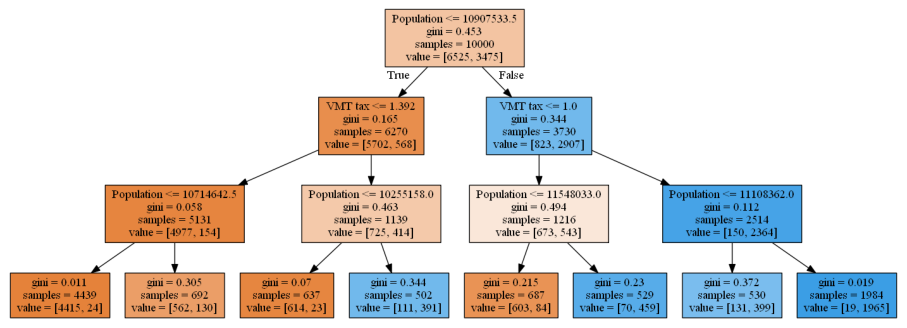

In [55]:
chooser = cart.tree_chooser()
chooser

In [56]:
refpoint = mm.run_reference_experiment()

In [57]:
from emat.analysis import Visualizer
viz = Visualizer(scope=scope, data=result, reference_point=refpoint)

In [58]:
viz.complete()